In [1]:
# from __future__ import print_function, division

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [5]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [6]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

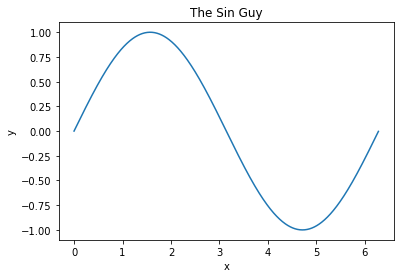

-1.0853464618138277e-60


In [12]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
x = np.arange(0,2*np.pi,.01)
y = np.sin(x)
plot_fn(x,y,"The Sin Guy")

In [13]:
# TODO then integrate y
integrate(y, .001)

-1.0853464613192585e-06

In [14]:
# TODO now use a np function to integrate y and compare
np.trapz(y, dx=.001)
#Has a lower error than our integrate function

5.07304434904654e-07

In [28]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
x=np.arange(0,6*np.pi,.01)
sinx=np.sin(x)
maxima=[]
minima=[]
diff=np.diff(sinx)
for i in range (1,len(diff)-1):
    if np.sign(diff[i])!=np.sign(diff[i+1]):
        if diff[i]>0:
            maxima.append(x[i])
        else:
            minima.append(x[i])
print maxima
print minima
        

[1.56, 7.84, 14.13]
[4.7, 10.99, 17.27]


# Part 2

In [30]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [31]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [56]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """
    # TODO edit this function
    
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape)
    num_freq=y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    
    y_fft=low_pass_filter*y_fft
    y_clean_values = np.fft.irfft(y_fft)
    
    return y_clean_values

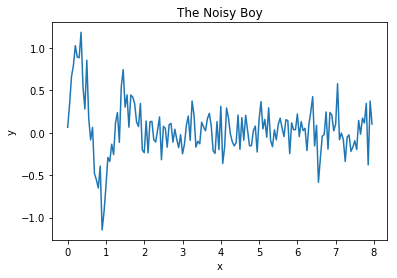

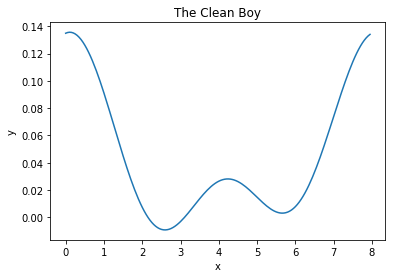

In [57]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
data_spacing=.05

x=np.arange(0,8,data_spacing)
noisy_y=noisy_packet(x,5,1,.2)
clean_y=clean_data(x,noisy_y)
plot_fn(x,noisy_y,'The Noisy Boy')
plot_fn(x,clean_y,'The Clean Boy')

# Part 3

In [15]:
# TODO mask the arrays, then plot

In [16]:
# TODO try to generate masked noisy data and then clean it